In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import itertools
import csv

In [2]:
df = pd.read_csv("Glass.csv", sep=',')
df.columns.values

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

In [3]:
data = df.iloc[:,0:9]
labels = df.iloc[:,9].astype(str)

In [4]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Euclidean metric and k tuning

             precision    recall  f1-score   support

          1       0.82      0.82      0.82        40
          3       0.83      0.74      0.78        34
          2       0.33      0.43      0.38         7
          5       0.55      0.86      0.67         7
          7       0.75      0.60      0.67         5
          6       0.92      0.86      0.89        14

avg / total       0.79      0.77      0.77       107

accuracy:  0.7663551401869159


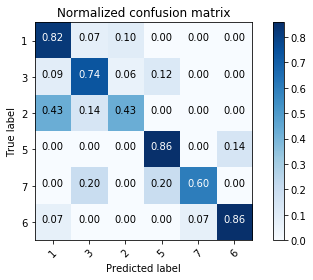

             precision    recall  f1-score   support

          1       0.60      0.80      0.69        30
          3       0.76      0.67      0.71        42
          2       0.40      0.20      0.27        10
          5       0.71      0.83      0.77         6
          7       0.50      0.50      0.50         4
          6       0.79      0.73      0.76        15

avg / total       0.67      0.67      0.66       107

accuracy:  0.6728971962616822


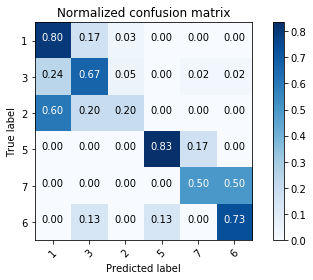

             precision    recall  f1-score   support

          1       0.73      0.63      0.68        38
          3       0.64      0.68      0.66        37
          2       0.44      0.50      0.47         8
          5       0.57      0.80      0.67         5
          7       0.57      0.67      0.62         6
          6       0.75      0.69      0.72        13

avg / total       0.66      0.65      0.66       107

accuracy:  0.6542056074766355


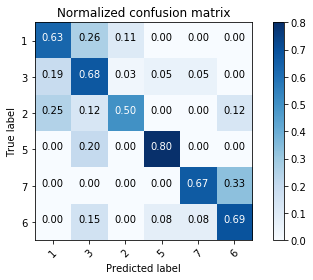

             precision    recall  f1-score   support

          1       0.65      0.69      0.67        32
          3       0.75      0.69      0.72        39
          2       0.31      0.44      0.36         9
          5       0.67      0.75      0.71         8
          7       0.50      0.33      0.40         3
          6       1.00      0.81      0.90        16

avg / total       0.71      0.68      0.69       107

accuracy:  0.6822429906542056


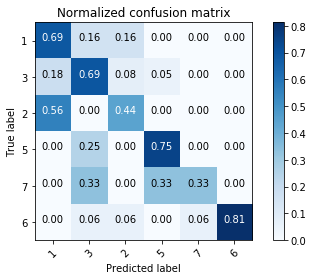

             precision    recall  f1-score   support

          1       0.62      0.84      0.71        31
          3       0.81      0.81      0.81        36
          2       0.75      0.25      0.38        12
          5       0.86      0.55      0.67        11
          7       0.60      0.75      0.67         4
          6       0.77      0.77      0.77        13

avg / total       0.74      0.72      0.71       107

accuracy:  0.719626168224299


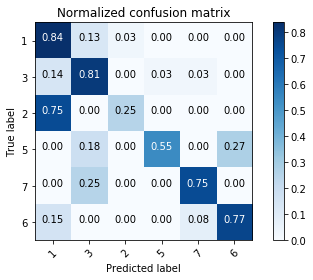

             precision    recall  f1-score   support

          1       0.67      0.51      0.58        39
          3       0.78      0.70      0.74        40
          2       0.11      0.40      0.17         5
          5       0.50      1.00      0.67         2
          7       0.67      0.40      0.50         5
          6       0.80      0.75      0.77        16

avg / total       0.70      0.62      0.65       107

accuracy:  0.616822429906542


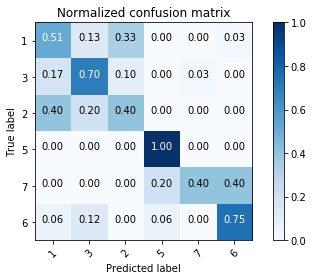

             precision    recall  f1-score   support

          1       0.62      0.62      0.62        32
          3       0.73      0.77      0.75        39
          2       0.38      0.33      0.35         9
          5       0.71      1.00      0.83         5
          7       1.00      0.43      0.60         7
          6       0.88      0.93      0.90        15

avg / total       0.71      0.70      0.69       107

accuracy:  0.7009345794392523


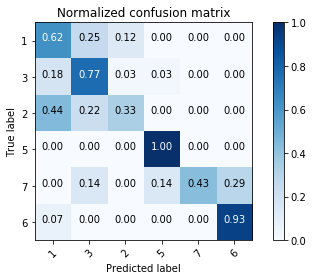

             precision    recall  f1-score   support

          1       0.66      0.76      0.71        38
          3       0.88      0.62      0.73        37
          2       0.33      0.50      0.40         8
          5       0.78      0.88      0.82         8
          7       0.40      1.00      0.57         2
          6       0.91      0.71      0.80        14

avg / total       0.75      0.70      0.71       107

accuracy:  0.7009345794392523


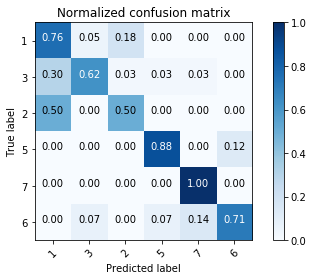

             precision    recall  f1-score   support

          1       0.61      0.69      0.65        32
          3       0.81      0.67      0.73        43
          2       0.22      0.33      0.27         6
          5       0.38      0.60      0.46         5
          7       1.00      0.40      0.57         5
          6       0.94      0.94      0.94        16

avg / total       0.72      0.68      0.69       107

accuracy:  0.6822429906542056


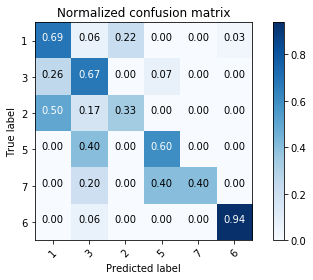

             precision    recall  f1-score   support

          1       0.66      0.76      0.71        38
          3       0.77      0.70      0.73        33
          2       0.40      0.36      0.38        11
          5       0.75      0.38      0.50         8
          7       0.40      0.50      0.44         4
          6       0.71      0.77      0.74        13

avg / total       0.67      0.66      0.66       107

accuracy:  0.6635514018691588


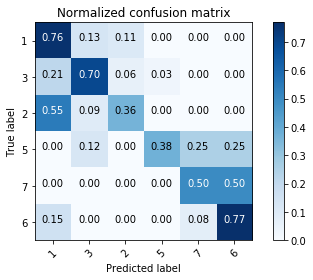

In [6]:
acc =[]
acc.append("Euclidean 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.63      0.73      0.68        37
          3       0.71      0.71      0.71        38
          2       0.00      0.00      0.00         8
          5       0.83      0.62      0.71         8
          7       0.33      0.20      0.25         5
          6       0.71      0.91      0.80        11

avg / total       0.62      0.65      0.63       107

accuracy:  0.6542056074766355


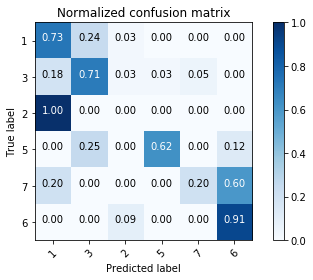

/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.53      0.79      0.63        33
          3       0.69      0.63      0.66        38
          2       0.20      0.11      0.14         9
          5       0.60      0.60      0.60         5
          7       0.00      0.00      0.00         4
          6       1.00      0.72      0.84        18

avg / total       0.62      0.63      0.61       107

accuracy:  0.6261682242990654


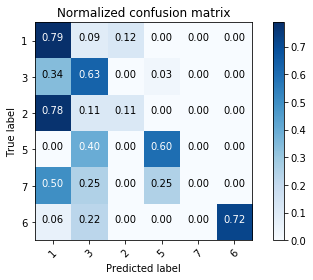

             precision    recall  f1-score   support

          1       0.67      0.76      0.71        34
          3       0.65      0.81      0.72        37
          2       0.33      0.11      0.17         9
          5       0.40      0.25      0.31         8
          7       0.50      0.20      0.29         5
          6       0.92      0.79      0.85        14

avg / total       0.64      0.66      0.64       107

accuracy:  0.6635514018691588


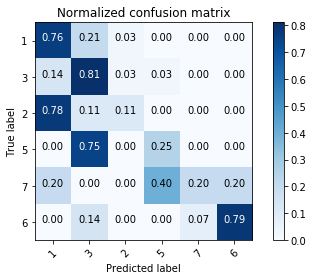

             precision    recall  f1-score   support

          1       0.58      0.83      0.68        36
          3       0.75      0.69      0.72        39
          2       1.00      0.12      0.22         8
          5       1.00      0.40      0.57         5
          7       0.00      0.00      0.00         4
          6       0.73      0.73      0.73        15

avg / total       0.69      0.66      0.64       107

accuracy:  0.6635514018691588


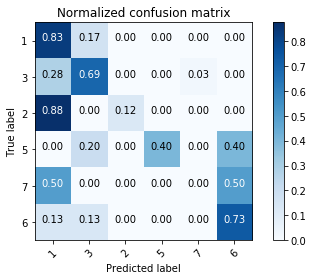

             precision    recall  f1-score   support

          1       0.70      0.81      0.75        37
          3       0.71      0.71      0.71        35
          2       0.33      0.29      0.31         7
          5       0.60      0.38      0.46         8
          7       0.20      0.33      0.25         3
          6       1.00      0.76      0.87        17

avg / total       0.71      0.69      0.69       107

accuracy:  0.6915887850467289


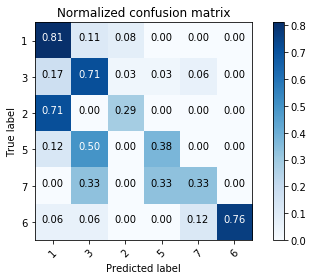

             precision    recall  f1-score   support

          1       0.50      0.73      0.59        33
          3       0.73      0.66      0.69        41
          2       0.50      0.10      0.17        10
          5       0.56      1.00      0.71         5
          7       0.00      0.00      0.00         6
          6       0.82      0.75      0.78        12

avg / total       0.60      0.62      0.58       107

accuracy:  0.616822429906542


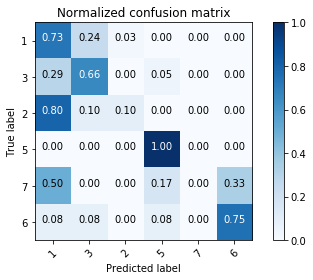

             precision    recall  f1-score   support

          1       0.65      0.88      0.75        34
          3       0.70      0.67      0.68        39
          2       0.00      0.00      0.00         9
          5       0.25      0.67      0.36         3
          7       1.00      0.75      0.86         4
          6       1.00      0.72      0.84        18

avg / total       0.68      0.69      0.67       107

accuracy:  0.6915887850467289


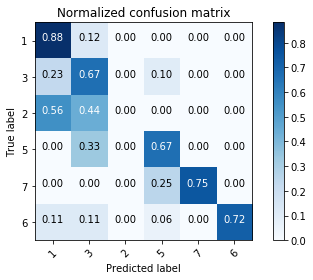

             precision    recall  f1-score   support

          1       0.58      0.69      0.63        36
          3       0.55      0.65      0.59        37
          2       0.40      0.25      0.31         8
          5       1.00      0.10      0.18        10
          7       0.00      0.00      0.00         5
          6       0.75      0.82      0.78        11

avg / total       0.58      0.57      0.54       107

accuracy:  0.5700934579439252


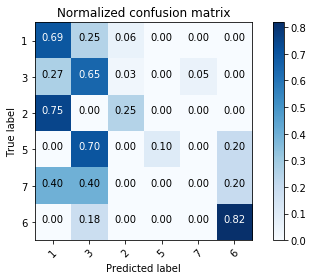

             precision    recall  f1-score   support

          1       0.66      0.84      0.74        37
          3       0.61      0.66      0.63        35
          2       0.50      0.43      0.46         7
          5       1.00      0.14      0.25         7
          7       1.00      0.40      0.57         5
          6       0.92      0.75      0.83        16

avg / total       0.71      0.67      0.66       107

accuracy:  0.6728971962616822


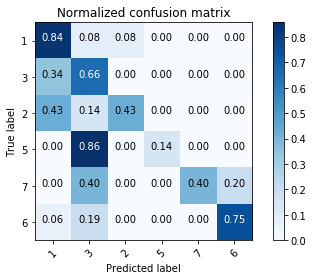

             precision    recall  f1-score   support

          1       0.49      0.82      0.61        33
          3       0.76      0.63      0.69        41
          2       0.00      0.00      0.00        10
          5       0.43      0.50      0.46         6
          7       0.00      0.00      0.00         4
          6       0.91      0.77      0.83        13

avg / total       0.58      0.62      0.58       107

accuracy:  0.616822429906542


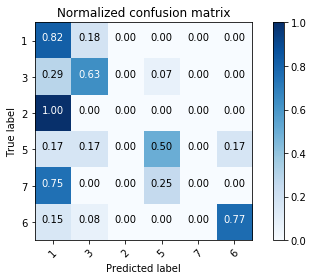

In [7]:
acc.append("Euclidean 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.58      0.76      0.66        38
          3       0.59      0.65      0.62        34
          2       0.00      0.00      0.00         8
          5       1.00      0.25      0.40         8
          7       0.00      0.00      0.00         4
          6       0.76      0.87      0.81        15

avg / total       0.58      0.62      0.57       107

accuracy:  0.616822429906542


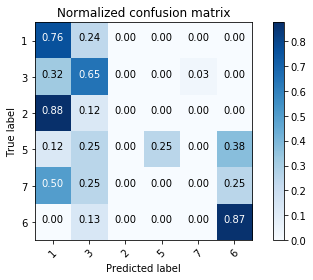

             precision    recall  f1-score   support

          1       0.55      0.97      0.70        32
          3       0.84      0.50      0.63        42
          2       0.00      0.00      0.00         9
          5       0.27      0.80      0.40         5
          7       0.00      0.00      0.00         5
          6       0.82      0.64      0.72        14

avg / total       0.61      0.61      0.57       107

accuracy:  0.6074766355140186


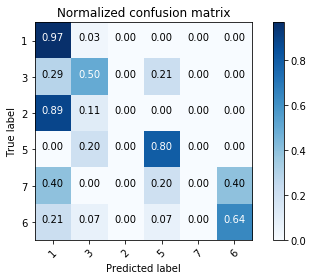

             precision    recall  f1-score   support

          1       0.54      0.79      0.64        34
          3       0.57      0.62      0.60        32
          2       0.00      0.00      0.00        12
          5       0.67      0.50      0.57         8
          7       0.00      0.00      0.00         8
          6       0.56      0.69      0.62        13

avg / total       0.46      0.56      0.50       107

accuracy:  0.5607476635514018


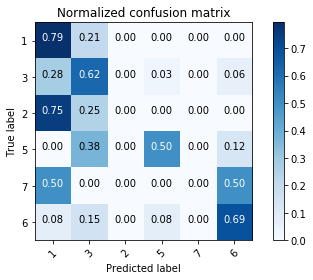

             precision    recall  f1-score   support

          1       0.56      0.86      0.68        36
          3       0.73      0.50      0.59        44
          2       0.00      0.00      0.00         5
          5       1.00      0.40      0.57         5
          7       0.00      0.00      0.00         1
          6       1.00      0.81      0.90        16

avg / total       0.69      0.64      0.63       107

accuracy:  0.6355140186915887


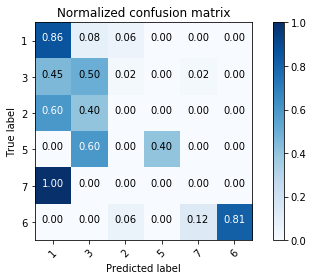

             precision    recall  f1-score   support

          1       0.55      0.85      0.67        33
          3       0.62      0.64      0.63        36
          2       0.00      0.00      0.00         9
          5       0.33      0.33      0.33         6
          7       0.00      0.00      0.00         6
          6       0.92      0.71      0.80        17

avg / total       0.54      0.61      0.56       107

accuracy:  0.6074766355140186


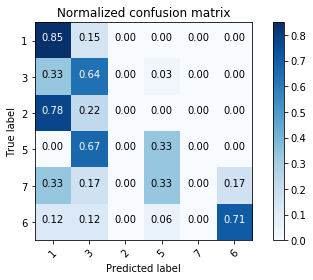

             precision    recall  f1-score   support

          1       0.63      0.86      0.73        37
          3       0.71      0.68      0.69        40
          2       0.00      0.00      0.00         8
          5       1.00      0.29      0.44         7
          7       0.00      0.00      0.00         3
          6       0.77      0.83      0.80        12

avg / total       0.63      0.66      0.63       107

accuracy:  0.6635514018691588


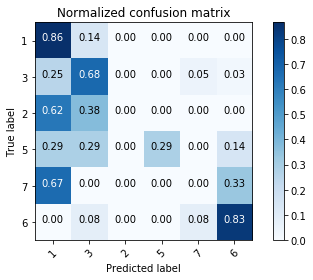

             precision    recall  f1-score   support

          1       0.53      0.85      0.65        34
          3       0.61      0.49      0.54        39
          2       0.50      0.11      0.18         9
          5       0.43      0.60      0.50         5
          7       0.00      0.00      0.00         6
          6       0.75      0.64      0.69        14

avg / total       0.55      0.57      0.53       107

accuracy:  0.5700934579439252


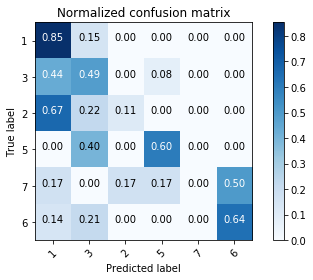

             precision    recall  f1-score   support

          1       0.64      0.83      0.72        36
          3       0.76      0.78      0.77        37
          2       0.00      0.00      0.00         8
          5       1.00      0.50      0.67         8
          7       0.00      0.00      0.00         3
          6       0.81      0.87      0.84        15

avg / total       0.67      0.71      0.68       107

accuracy:  0.7102803738317757


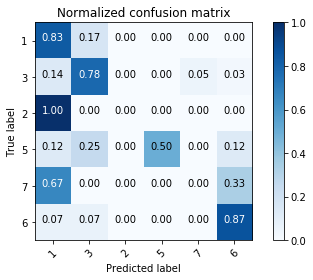

             precision    recall  f1-score   support

          1       0.61      0.80      0.69        41
          3       0.61      0.65      0.62        31
          2       0.00      0.00      0.00        11
          5       0.40      0.50      0.44         4
          7       0.00      0.00      0.00         6
          6       0.86      0.86      0.86        14

avg / total       0.54      0.63      0.58       107

accuracy:  0.6261682242990654


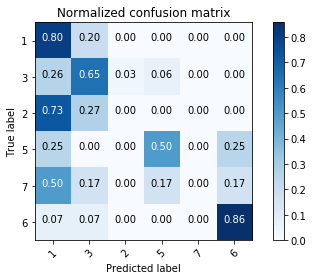

             precision    recall  f1-score   support

          1       0.56      0.93      0.70        29
          3       0.71      0.67      0.69        45
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00         9
          7       0.00      0.00      0.00         3
          6       0.75      0.80      0.77        15

avg / total       0.56      0.64      0.59       107

accuracy:  0.6448598130841121


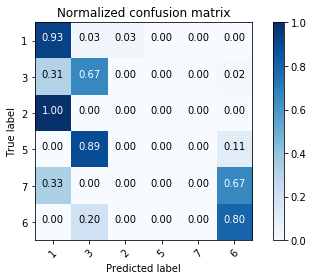

In [8]:
acc.append("Euclidean 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.51      0.88      0.64        32
          3       0.65      0.68      0.67        38
          2       0.00      0.00      0.00         9
          5       0.00      0.00      0.00        10
          7       0.00      0.00      0.00         5
          6       0.92      0.85      0.88        13

avg / total       0.49      0.61      0.54       107

accuracy:  0.6074766355140186


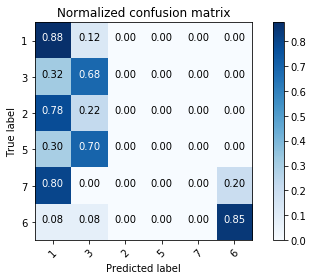

             precision    recall  f1-score   support

          1       0.55      0.79      0.65        38
          3       0.68      0.55      0.61        38
          2       0.00      0.00      0.00         8
          5       0.43      1.00      0.60         3
          7       0.00      0.00      0.00         4
          6       0.86      0.75      0.80        16

avg / total       0.57      0.62      0.58       107

accuracy:  0.616822429906542


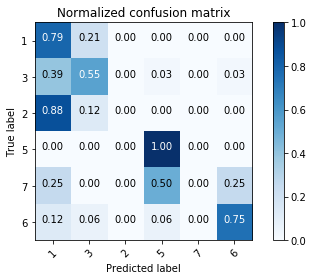

             precision    recall  f1-score   support

          1       0.49      0.93      0.64        30
          3       0.84      0.63      0.72        43
          2       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         6
          6       0.61      0.92      0.73        12

avg / total       0.55      0.62      0.55       107

accuracy:  0.616822429906542


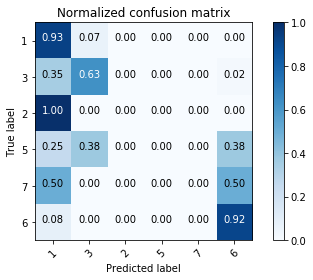

             precision    recall  f1-score   support

          1       0.64      0.72      0.68        40
          3       0.49      0.67      0.56        33
          2       0.00      0.00      0.00         9
          5       0.33      0.20      0.25         5
          7       0.00      0.00      0.00         3
          6       1.00      0.82      0.90        17

avg / total       0.57      0.62      0.58       107

accuracy:  0.616822429906542


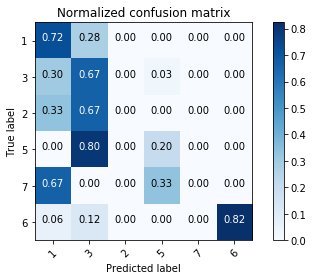

             precision    recall  f1-score   support

          1       0.73      0.85      0.79        39
          3       0.51      0.86      0.64        28
          2       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         9
          7       0.00      0.00      0.00         6
          6       0.73      0.69      0.71        16

avg / total       0.51      0.64      0.56       107

accuracy:  0.6355140186915887


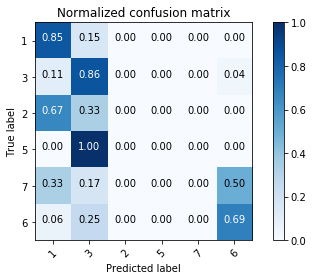

             precision    recall  f1-score   support

          1       0.44      0.77      0.56        31
          3       0.70      0.44      0.54        48
          2       0.00      0.00      0.00         8
          5       0.11      0.25      0.15         4
          7       0.00      0.00      0.00         3
          6       0.79      0.85      0.81        13

avg / total       0.54      0.53      0.51       107

accuracy:  0.5327102803738317


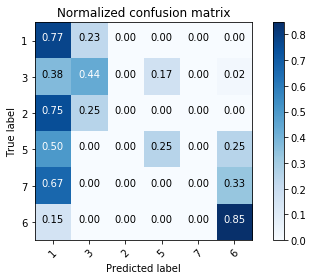

             precision    recall  f1-score   support

          1       0.69      0.84      0.76        37
          3       0.60      0.75      0.67        36
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00        10
          7       0.00      0.00      0.00         5
          6       0.69      0.85      0.76        13

avg / total       0.52      0.64      0.58       107

accuracy:  0.6448598130841121


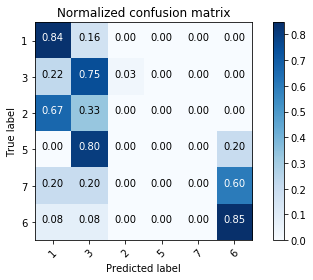

             precision    recall  f1-score   support

          1       0.49      0.88      0.63        33
          3       0.68      0.53      0.59        40
          2       0.00      0.00      0.00        11
          5       0.50      0.67      0.57         3
          7       0.00      0.00      0.00         4
          6       0.85      0.69      0.76        16

avg / total       0.55      0.59      0.55       107

accuracy:  0.5887850467289719


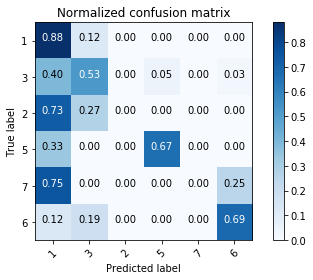

             precision    recall  f1-score   support

          1       0.54      0.93      0.68        30
          3       0.76      0.56      0.64        45
          2       0.00      0.00      0.00         9
          5       0.09      0.50      0.15         2
          7       0.00      0.00      0.00         7
          6       0.82      0.64      0.72        14

avg / total       0.58      0.59      0.56       107

accuracy:  0.5887850467289719


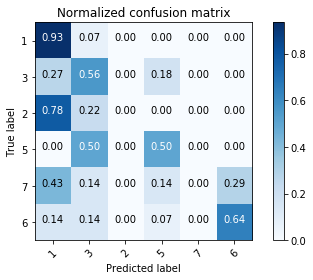

             precision    recall  f1-score   support

          1       0.63      0.72      0.67        40
          3       0.47      0.65      0.54        31
          2       0.00      0.00      0.00         8
          5       0.00      0.00      0.00        11
          7       0.00      0.00      0.00         2
          6       0.81      0.87      0.84        15

avg / total       0.48      0.58      0.53       107

accuracy:  0.5794392523364486


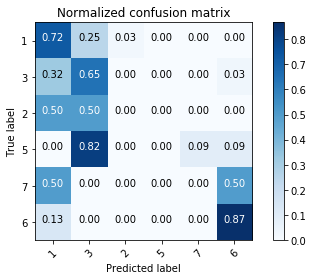

In [9]:
acc.append("Euclidean 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.54      0.70      0.61        37
          3       0.59      0.56      0.58        39
          2       0.00      0.00      0.00         8
          5       0.33      0.25      0.29         4
          7       0.00      0.00      0.00         4
          6       0.88      1.00      0.94        15

avg / total       0.54      0.60      0.56       107

accuracy:  0.5981308411214953


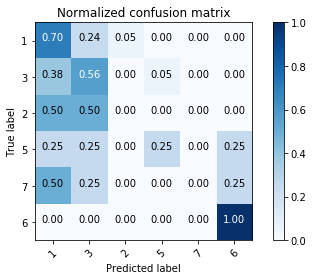

             precision    recall  f1-score   support

          1       0.55      0.85      0.67        33
          3       0.64      0.68      0.66        37
          2       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         9
          7       0.00      0.00      0.00         5
          6       0.53      0.64      0.58        14

avg / total       0.46      0.58      0.51       107

accuracy:  0.5794392523364486


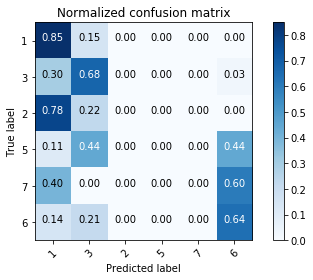

             precision    recall  f1-score   support

          1       0.46      0.90      0.60        29
          3       0.53      0.53      0.53        34
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         6
          6       0.88      0.70      0.78        20

avg / total       0.46      0.54      0.48       107

accuracy:  0.5420560747663551


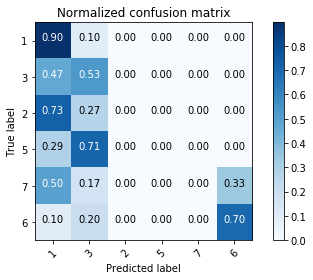

             precision    recall  f1-score   support

          1       0.65      0.73      0.69        41
          3       0.65      0.67      0.66        42
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         3
          6       0.60      1.00      0.75         9

avg / total       0.56      0.63      0.59       107

accuracy:  0.6261682242990654


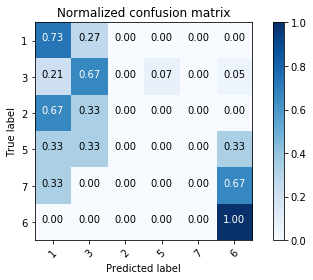

             precision    recall  f1-score   support

          1       0.61      0.89      0.72        35
          3       0.65      0.59      0.62        37
          2       0.00      0.00      0.00         7
          5       0.50      0.40      0.44         5
          7       0.17      0.50      0.25         2
          6       1.00      0.52      0.69        21

avg / total       0.65      0.63      0.61       107

accuracy:  0.6261682242990654


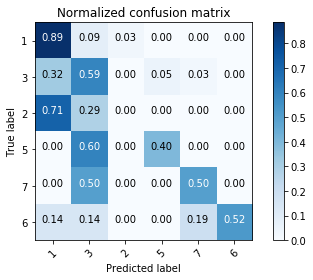

             precision    recall  f1-score   support

          1       0.52      0.77      0.62        35
          3       0.62      0.67      0.64        39
          2       0.00      0.00      0.00        10
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         7
          6       0.54      0.88      0.67         8

avg / total       0.44      0.56      0.49       107

accuracy:  0.5607476635514018


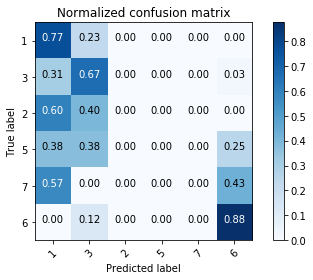

             precision    recall  f1-score   support

          1       0.60      0.87      0.71        38
          3       0.67      0.61      0.64        36
          2       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         5
          6       0.47      0.69      0.56        13

avg / total       0.49      0.60      0.53       107

accuracy:  0.5981308411214953


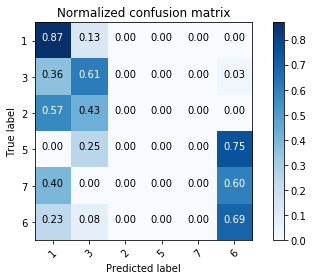

             precision    recall  f1-score   support

          1       0.49      0.81      0.61        32
          3       0.63      0.60      0.62        40
          2       0.00      0.00      0.00        10
          5       0.00      0.00      0.00         5
          7       0.00      0.00      0.00         4
          6       1.00      0.88      0.93        16

avg / total       0.53      0.60      0.55       107

accuracy:  0.5981308411214953


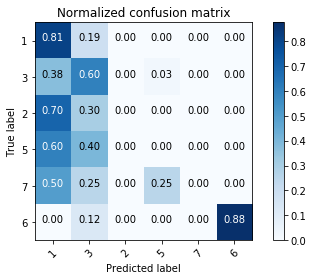

             precision    recall  f1-score   support

          1       0.54      0.74      0.63        35
          3       0.56      0.63      0.59        35
          2       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         7
          6       0.65      0.76      0.70        17

avg / total       0.46      0.57      0.51       107

accuracy:  0.5700934579439252


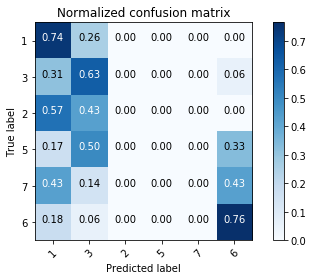

             precision    recall  f1-score   support

          1       0.61      0.86      0.71        35
          3       0.64      0.73      0.68        41
          2       0.00      0.00      0.00        10
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         2
          6       0.91      0.83      0.87        12

avg / total       0.55      0.65      0.59       107

accuracy:  0.6542056074766355


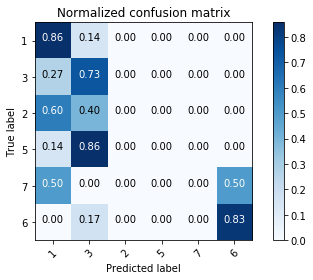

In [10]:
acc.append("Euclidean 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.54      0.79      0.64        33
          3       0.38      0.66      0.48        32
          2       0.00      0.00      0.00        13
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         4
          6       0.50      0.12      0.19        17

avg / total       0.36      0.46      0.37       107

accuracy:  0.45794392523364486


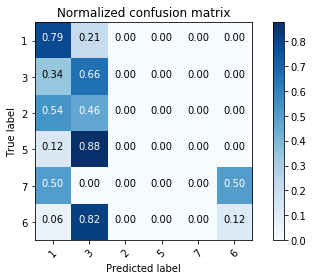

             precision    recall  f1-score   support

          1       0.48      0.78      0.59        37
          3       0.63      0.43      0.51        44
          2       0.00      0.00      0.00         4
          5       0.00      0.00      0.00         5
          7       0.00      0.00      0.00         5
          6       0.60      0.75      0.67        12

avg / total       0.49      0.53      0.49       107

accuracy:  0.5327102803738317


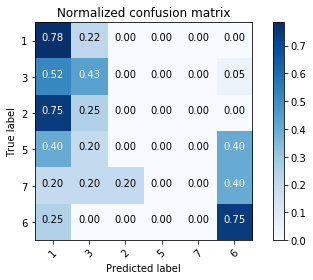

             precision    recall  f1-score   support

          1       0.54      0.97      0.69        34
          3       0.64      0.49      0.55        37
          2       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         7
          6       0.67      0.80      0.73        15

avg / total       0.49      0.59      0.51       107

accuracy:  0.5887850467289719


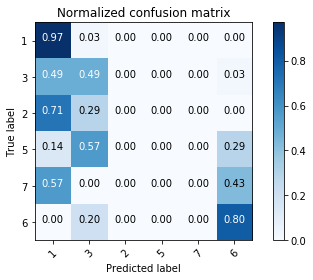

             precision    recall  f1-score   support

          1       0.50      0.72      0.59        36
          3       0.65      0.67      0.66        39
          2       0.00      0.00      0.00        10
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         2
          6       0.73      0.79      0.76        14

avg / total       0.50      0.59      0.54       107

accuracy:  0.5887850467289719


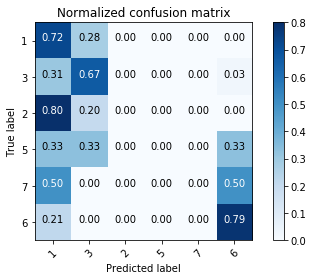

             precision    recall  f1-score   support

          1       0.55      0.82      0.66        34
          3       0.67      0.65      0.66        40
          2       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         4
          6       0.59      0.71      0.65        14

avg / total       0.50      0.60      0.54       107

accuracy:  0.5981308411214953


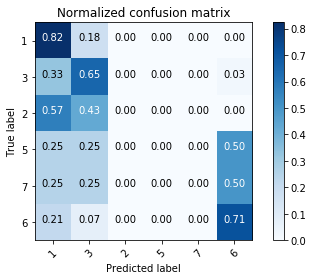

             precision    recall  f1-score   support

          1       0.42      0.39      0.41        36
          3       0.44      0.69      0.54        36
          2       0.00      0.00      0.00        10
          5       0.00      0.00      0.00         5
          7       0.00      0.00      0.00         5
          6       0.76      0.87      0.81        15

avg / total       0.40      0.49      0.43       107

accuracy:  0.48598130841121495


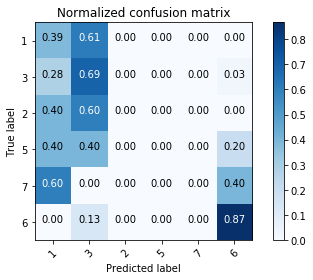

             precision    recall  f1-score   support

          1       0.58      0.76      0.66        38
          3       0.63      0.59      0.61        41
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         4
          6       0.58      0.92      0.71        12

avg / total       0.51      0.60      0.55       107

accuracy:  0.5981308411214953


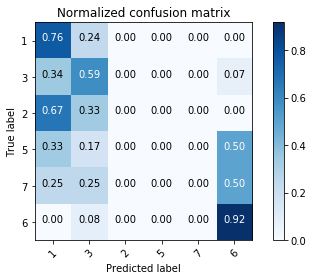

             precision    recall  f1-score   support

          1       0.41      0.78      0.54        32
          3       0.42      0.40      0.41        35
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         5
          6       0.85      0.65      0.73        17

avg / total       0.40      0.47      0.41       107

accuracy:  0.4672897196261682


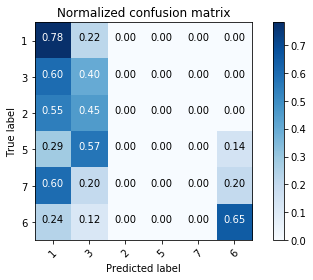

             precision    recall  f1-score   support

          1       0.62      0.81      0.70        36
          3       0.65      0.74      0.69        38
          2       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         4
          7       0.00      0.00      0.00         6
          6       0.76      0.87      0.81        15

avg / total       0.55      0.65      0.59       107

accuracy:  0.6542056074766355


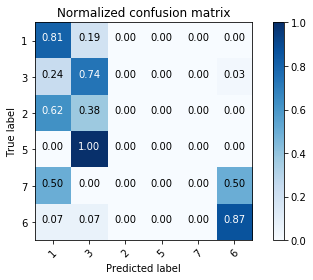

             precision    recall  f1-score   support

          1       0.48      0.88      0.62        34
          3       0.52      0.39      0.45        38
          2       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         9
          7       0.00      0.00      0.00         3
          6       0.69      0.79      0.73        14

avg / total       0.43      0.52      0.45       107

accuracy:  0.5233644859813084


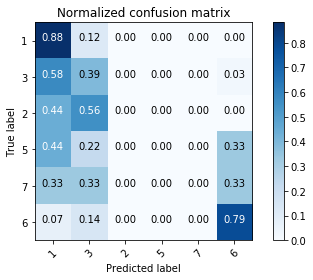

In [11]:
acc.append("Euclidean 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.48      0.39      0.43        36
          3       0.38      0.71      0.49        38
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00        11
          7       0.00      0.00      0.00         5
          6       0.17      0.09      0.12        11

avg / total       0.31      0.39      0.33       107

accuracy:  0.3925233644859813


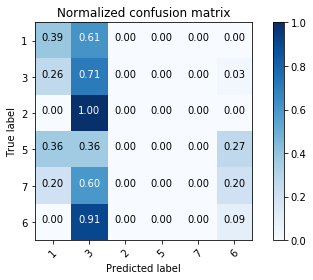

             precision    recall  f1-score   support

          1       0.31      0.47      0.37        34
          3       0.45      0.66      0.54        38
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         2
          7       0.00      0.00      0.00         4
          6       0.00      0.00      0.00        18

avg / total       0.26      0.38      0.31       107

accuracy:  0.38317757009345793


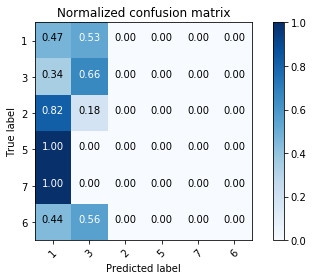

             precision    recall  f1-score   support

          1       0.46      0.43      0.44        37
          3       0.39      0.69      0.50        39
          2       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         4
          6       0.33      0.08      0.12        13

avg / total       0.34      0.41      0.35       107

accuracy:  0.411214953271028


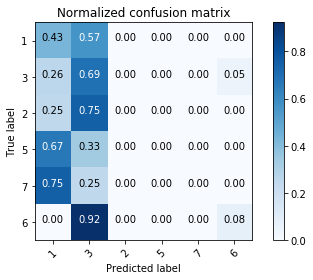

             precision    recall  f1-score   support

          1       0.39      0.91      0.55        33
          3       0.47      0.38      0.42        37
          2       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         5
          6       0.00      0.00      0.00        16

avg / total       0.28      0.41      0.31       107

accuracy:  0.411214953271028


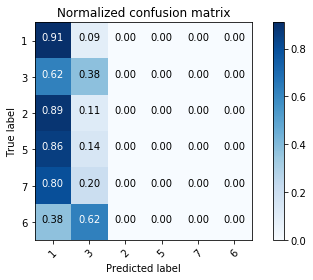

             precision    recall  f1-score   support

          1       0.28      0.25      0.26        36
          3       0.36      0.73      0.48        37
          2       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         5
          7       0.00      0.00      0.00         3
          6       0.00      0.00      0.00        17

avg / total       0.22      0.34      0.26       107

accuracy:  0.3364485981308411


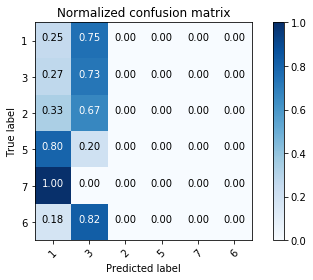

             precision    recall  f1-score   support

          1       0.40      0.97      0.57        34
          3       0.50      0.26      0.34        39
          2       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         6
          6       1.00      0.42      0.59        12

avg / total       0.42      0.45      0.37       107

accuracy:  0.4485981308411215


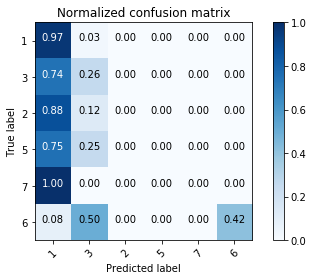

             precision    recall  f1-score   support

          1       0.53      0.93      0.67        41
          3       0.57      0.33      0.41        40
          2       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         5
          6       0.67      0.67      0.67        12

avg / total       0.49      0.55      0.49       107

accuracy:  0.5514018691588785


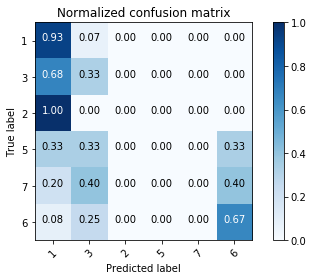

             precision    recall  f1-score   support

          1       0.23      0.34      0.28        29
          3       0.36      0.64      0.46        36
          2       0.00      0.00      0.00        14
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         4
          6       0.00      0.00      0.00        17

avg / total       0.18      0.31      0.23       107

accuracy:  0.308411214953271


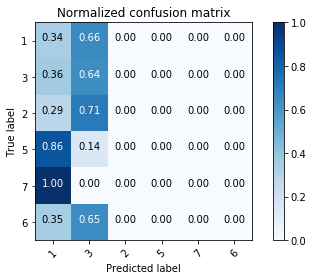

             precision    recall  f1-score   support

          1       0.40      0.71      0.51        34
          3       0.45      0.55      0.49        38
          2       0.00      0.00      0.00        12
          5       0.00      0.00      0.00         5
          7       0.00      0.00      0.00         3
          6       0.00      0.00      0.00        15

avg / total       0.29      0.42      0.34       107

accuracy:  0.4205607476635514


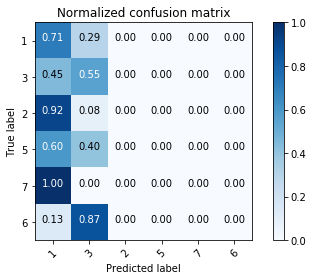

             precision    recall  f1-score   support

          1       0.33      0.39      0.35        36
          3       0.39      0.66      0.49        38
          2       0.00      0.00      0.00         5
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         6
          6       0.00      0.00      0.00        14

avg / total       0.25      0.36      0.29       107

accuracy:  0.3644859813084112


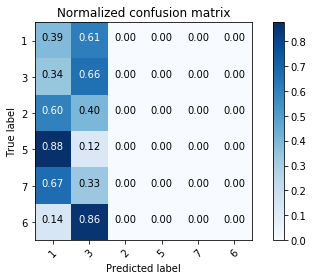

In [12]:
acc.append("Euclidean 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Minkowski metric and k tunning

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.68      0.76      0.71        33
          3       0.84      0.68      0.75        40
          2       0.40      0.50      0.44         8
          5       0.71      1.00      0.83         5
          7       0.67      0.80      0.73         5
          6       1.00      0.94      0.97        16

avg / total       0.77      0.75      0.75       107

accuracy:  0.7476635514018691


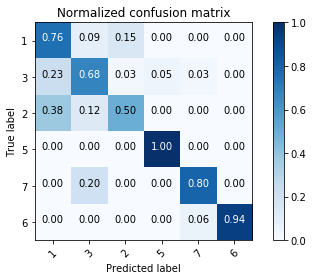

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.73      0.86      0.79        37
          3       0.78      0.78      0.78        36
          2       0.40      0.22      0.29         9
          5       0.88      0.88      0.88         8
          7       1.00      0.25      0.40         4
          6       0.77      0.77      0.77        13

avg / total       0.74      0.75      0.73       107

accuracy:  0.7476635514018691


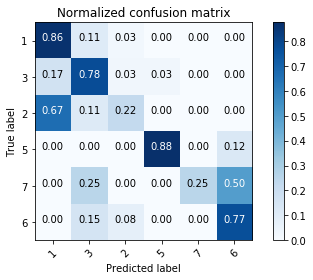

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.61      0.64      0.62        36
          3       0.76      0.62      0.68        40
          2       0.08      0.20      0.12         5
          5       0.71      0.71      0.71         7
          7       0.50      0.67      0.57         3
          6       0.92      0.75      0.83        16

avg / total       0.69      0.64      0.66       107

accuracy:  0.6355140186915887


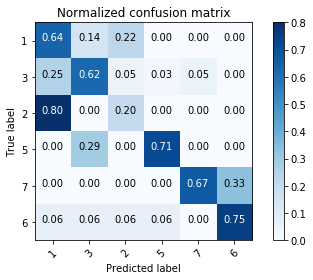

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.66      0.85      0.74        34
          3       0.79      0.86      0.83        36
          2       0.50      0.08      0.14        12
          5       0.75      0.50      0.60         6
          7       0.75      0.50      0.60         6
          6       0.79      0.85      0.81        13

avg / total       0.71      0.73      0.70       107

accuracy:  0.7289719626168224


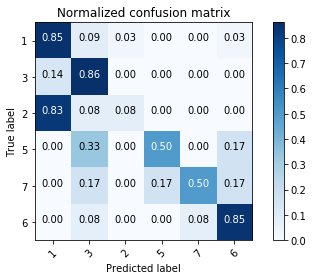

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.70      0.72      0.71        32
          3       0.85      0.72      0.78        39
          2       0.21      0.50      0.30         6
          5       1.00      0.50      0.67        10
          7       0.67      0.67      0.67         3
          6       0.79      0.88      0.83        17

avg / total       0.77      0.71      0.73       107

accuracy:  0.7102803738317757


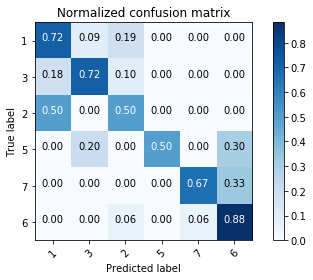

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.66      0.87      0.75        38
          3       0.85      0.62      0.72        37
          2       0.43      0.27      0.33        11
          5       0.33      1.00      0.50         3
          7       0.75      0.50      0.60         6
          6       0.90      0.75      0.82        12

avg / total       0.73      0.69      0.69       107

accuracy:  0.6915887850467289


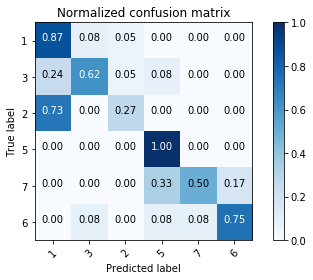

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.72      0.78      0.75        40
          3       0.79      0.72      0.75        32
          2       0.33      0.38      0.35         8
          5       0.86      0.86      0.86         7
          7       0.67      0.67      0.67         3
          6       0.88      0.82      0.85        17

avg / total       0.75      0.74      0.74       107

accuracy:  0.7383177570093458


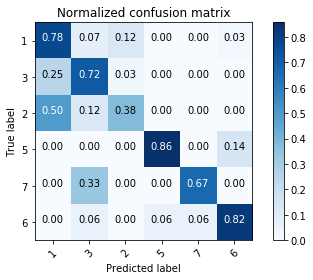

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.57      0.70      0.63        30
          3       0.81      0.59      0.68        44
          2       0.40      0.44      0.42         9
          5       0.60      1.00      0.75         6
          7       0.40      0.33      0.36         6
          6       0.77      0.83      0.80        12

avg / total       0.67      0.64      0.64       107

accuracy:  0.6448598130841121


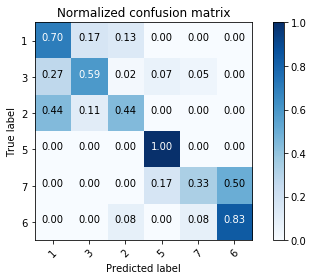

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.69      0.68      0.68        37
          3       0.68      0.73      0.70        37
          2       0.33      0.62      0.43         8
          5       1.00      0.57      0.73         7
          7       0.00      0.00      0.00         6
          6       0.91      0.83      0.87        12

avg / total       0.67      0.66      0.66       107

accuracy:  0.6635514018691588


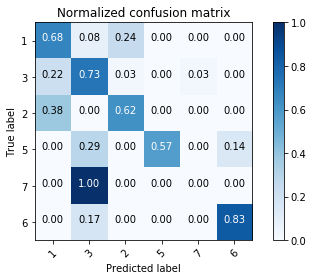

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.66      0.82      0.73        33
          3       0.77      0.62      0.69        39
          2       0.40      0.22      0.29         9
          5       0.67      1.00      0.80         6
          7       0.00      0.00      0.00         3
          6       0.88      0.88      0.88        17

avg / total       0.70      0.69      0.68       107

accuracy:  0.6915887850467289


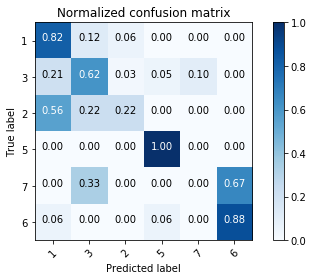

In [13]:
acc.append("Minkowski 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.60      0.75      0.67        32
          3       0.72      0.75      0.73        44
          2       0.20      0.20      0.20         5
          5       0.60      0.43      0.50         7
          7       0.00      0.00      0.00         5
          6       0.82      0.64      0.72        14

avg / total       0.63      0.65      0.64       107

accuracy:  0.6542056074766355


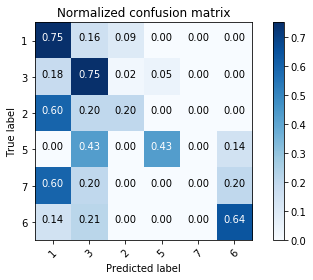

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.59      0.76      0.67        38
          3       0.59      0.62      0.61        32
          2       0.33      0.08      0.13        12
          5       0.75      0.50      0.60         6
          7       0.33      0.25      0.29         4
          6       0.93      0.87      0.90        15

avg / total       0.61      0.63      0.60       107

accuracy:  0.6261682242990654


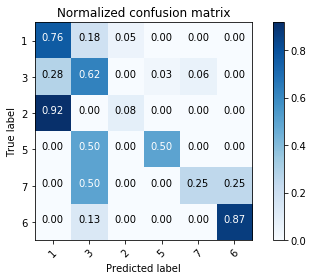

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.47      0.86      0.61        28
          3       0.63      0.46      0.54        41
          2       0.25      0.11      0.15         9
          5       0.50      0.33      0.40         9
          7       0.50      0.33      0.40         6
          6       0.83      0.71      0.77        14

avg / total       0.57      0.55      0.53       107

accuracy:  0.5514018691588785


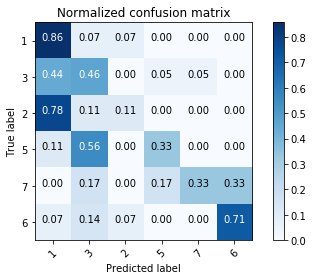

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.64      0.81      0.72        42
          3       0.62      0.60      0.61        35
          2       0.00      0.00      0.00         8
          5       0.80      1.00      0.89         4
          7       0.00      0.00      0.00         3
          6       1.00      0.80      0.89        15

avg / total       0.62      0.66      0.64       107

accuracy:  0.6635514018691588


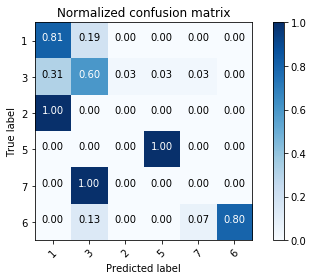

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.53      0.73      0.62        33
          3       0.56      0.65      0.60        37
          2       0.00      0.00      0.00        12
          5       0.50      0.33      0.40         6
          7       0.00      0.00      0.00         2
          6       1.00      0.76      0.87        17

avg / total       0.54      0.59      0.56       107

accuracy:  0.5887850467289719


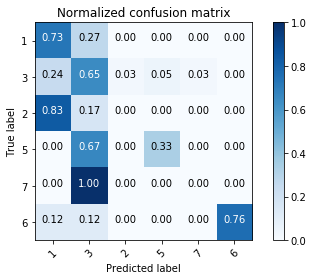

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.56      0.78      0.65        37
          3       0.71      0.44      0.54        39
          2       0.20      0.20      0.20         5
          5       0.40      0.57      0.47         7
          7       0.67      0.29      0.40         7
          6       0.69      0.75      0.72        12

avg / total       0.61      0.58      0.57       107

accuracy:  0.5794392523364486


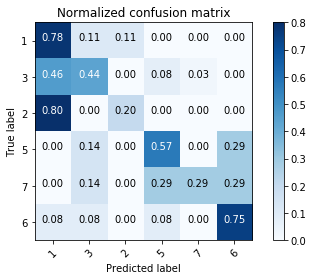

             precision    recall  f1-score   support

          1       0.60      0.83      0.70        36
          3       0.66      0.72      0.69        32
          2       0.00      0.00      0.00        10
          5       0.71      0.83      0.77         6
          7       0.00      0.00      0.00         7
          6       0.93      0.88      0.90        16

avg / total       0.58      0.67      0.62       107

accuracy:  0.6728971962616822


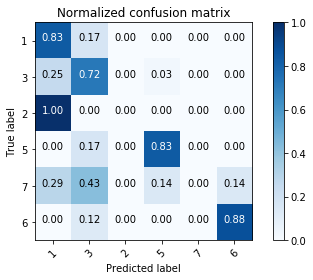

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.62      0.82      0.71        34
          3       0.84      0.61      0.71        44
          2       0.20      0.14      0.17         7
          5       0.38      0.43      0.40         7
          7       0.17      0.50      0.25         2
          6       0.73      0.62      0.67        13

avg / total       0.67      0.64      0.64       107

accuracy:  0.6355140186915887


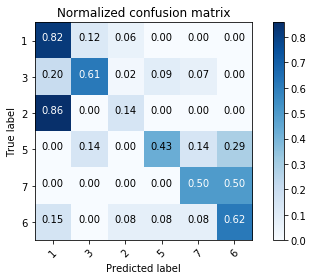

             precision    recall  f1-score   support

          1       0.65      0.88      0.75        41
          3       0.72      0.59      0.65        39
          2       0.00      0.00      0.00         9
          5       0.29      0.67      0.40         3
          7       0.25      0.20      0.22         5
          6       0.78      0.70      0.74        10

avg / total       0.61      0.64      0.61       107

accuracy:  0.6448598130841121


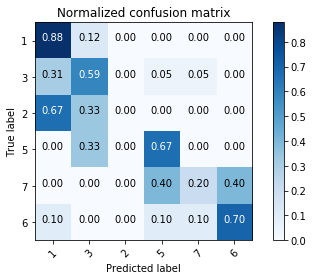

set(['1', '3', '2', '5', '7', '6'])
             precision    recall  f1-score   support

          1       0.58      0.72      0.65        29
          3       0.60      0.81      0.69        37
          2       0.50      0.12      0.20         8
          5       1.00      0.10      0.18        10
          7       0.00      0.00      0.00         4
          6       1.00      0.84      0.91        19

avg / total       0.67      0.64      0.61       107

accuracy:  0.6448598130841121


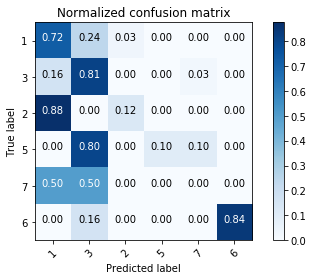

In [14]:
acc.append("Minkowski 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.62      0.86      0.72        37
          3       0.74      0.66      0.69        38
          2       0.00      0.00      0.00         6
          5       0.40      0.57      0.47         7
          7       0.00      0.00      0.00         4
          6       1.00      0.73      0.85        15

avg / total       0.64      0.67      0.64       107

accuracy:  0.6728971962616822


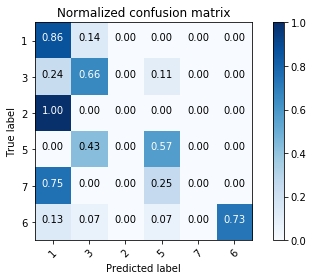

             precision    recall  f1-score   support

          1       0.55      0.73      0.62        33
          3       0.62      0.63      0.62        38
          2       0.25      0.09      0.13        11
          5       1.00      0.33      0.50         6
          7       0.67      0.40      0.50         5
          6       0.80      0.86      0.83        14

avg / total       0.60      0.61      0.59       107

accuracy:  0.6074766355140186


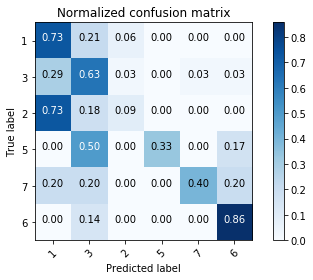

             precision    recall  f1-score   support

          1       0.47      0.83      0.60        29
          3       0.56      0.62      0.59        37
          2       0.00      0.00      0.00        12
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         5
          6       0.73      0.69      0.71        16

avg / total       0.43      0.54      0.47       107

accuracy:  0.5420560747663551


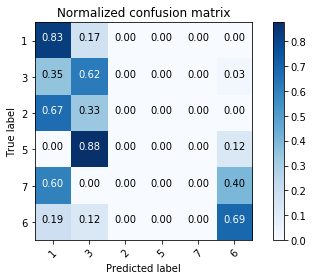

             precision    recall  f1-score   support

          1       0.67      0.73      0.70        41
          3       0.60      0.54      0.57        39
          2       0.25      0.20      0.22         5
          5       0.30      0.60      0.40         5
          7       0.00      0.00      0.00         4
          6       0.92      0.85      0.88        13

avg / total       0.61      0.62      0.61       107

accuracy:  0.616822429906542


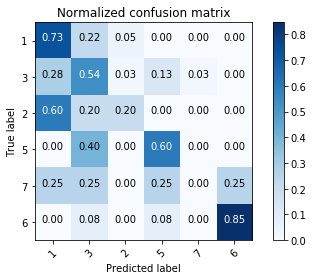

             precision    recall  f1-score   support

          1       0.54      0.90      0.68        30
          3       0.70      0.61      0.65        38
          2       0.50      0.12      0.20         8
          5       0.50      0.50      0.50         6
          7       0.00      0.00      0.00         6
          6       0.88      0.74      0.80        19

avg / total       0.62      0.64      0.60       107

accuracy:  0.6355140186915887


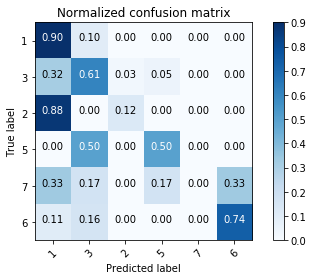

             precision    recall  f1-score   support

          1       0.64      0.75      0.69        40
          3       0.60      0.71      0.65        38
          2       0.50      0.11      0.18         9
          5       1.00      0.14      0.25         7
          7       0.00      0.00      0.00         3
          6       0.89      0.80      0.84        10

avg / total       0.64      0.63      0.60       107

accuracy:  0.6261682242990654


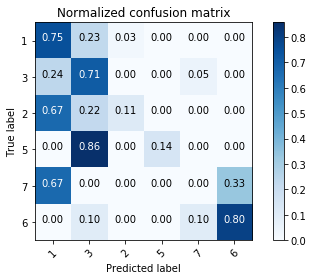

             precision    recall  f1-score   support

          1       0.46      0.88      0.60        32
          3       0.78      0.44      0.56        48
          2       0.00      0.00      0.00         6
          5       0.50      0.80      0.62         5
          7       0.00      0.00      0.00         4
          6       0.91      0.83      0.87        12

avg / total       0.61      0.59      0.56       107

accuracy:  0.5887850467289719


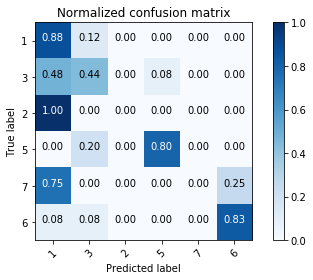

             precision    recall  f1-score   support

          1       0.67      0.79      0.72        38
          3       0.48      0.79      0.59        28
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         5
          6       0.93      0.76      0.84        17

avg / total       0.51      0.61      0.55       107

accuracy:  0.6074766355140186


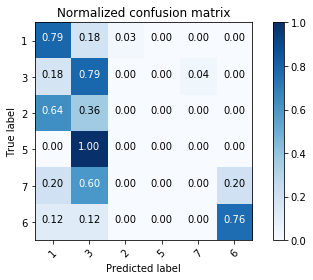

             precision    recall  f1-score   support

          1       0.60      0.80      0.68        35
          3       0.62      0.69      0.66        36
          2       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         9
          7       0.00      0.00      0.00         6
          6       0.63      0.92      0.75        13

avg / total       0.48      0.61      0.54       107

accuracy:  0.6074766355140186


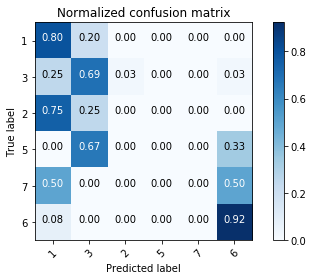

             precision    recall  f1-score   support

          1       0.57      0.83      0.67        35
          3       0.64      0.57      0.61        40
          2       0.00      0.00      0.00         9
          5       0.38      0.75      0.50         4
          7       0.00      0.00      0.00         3
          6       1.00      0.62      0.77        16

avg / total       0.59      0.61      0.58       107

accuracy:  0.6074766355140186


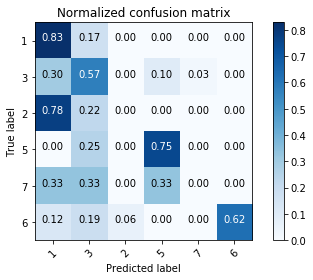

In [15]:
acc.append("Minkowski 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.51      0.76      0.61        34
          3       0.67      0.57      0.62        42
          2       0.00      0.00      0.00         7
          5       0.50      0.50      0.50         4
          7       0.00      0.00      0.00         4
          6       0.87      0.81      0.84        16

avg / total       0.57      0.61      0.58       107

accuracy:  0.6074766355140186


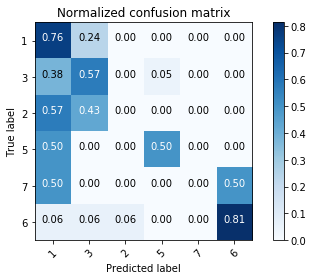

             precision    recall  f1-score   support

          1       0.54      0.92      0.68        36
          3       0.61      0.56      0.58        34
          2       0.00      0.00      0.00        10
          5       0.00      0.00      0.00         9
          7       0.00      0.00      0.00         5
          6       0.67      0.77      0.71        13

avg / total       0.46      0.58      0.50       107

accuracy:  0.5794392523364486


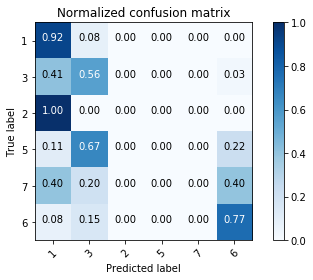

             precision    recall  f1-score   support

          1       0.59      0.77      0.67        35
          3       0.52      0.64      0.57        36
          2       0.00      0.00      0.00        10
          5       0.67      0.40      0.50         5
          7       0.00      0.00      0.00         4
          6       0.86      0.71      0.77        17

avg / total       0.54      0.60      0.56       107

accuracy:  0.5981308411214953


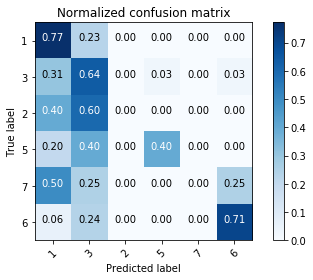

             precision    recall  f1-score   support

          1       0.54      0.77      0.64        35
          3       0.62      0.65      0.63        40
          2       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         5
          6       0.71      0.83      0.77        12

avg / total       0.49      0.59      0.53       107

accuracy:  0.5887850467289719


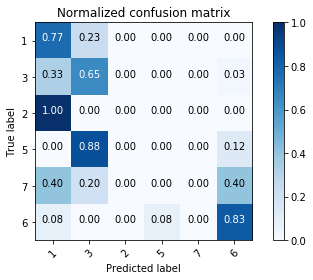

             precision    recall  f1-score   support

          1       0.57      0.75      0.65        32
          3       0.48      0.66      0.55        35
          2       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         6
          6       0.71      0.71      0.71        17

avg / total       0.44      0.55      0.49       107

accuracy:  0.5514018691588785


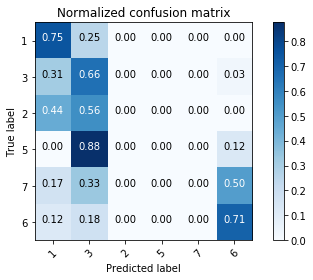

             precision    recall  f1-score   support

          1       0.54      0.84      0.66        38
          3       0.62      0.44      0.51        41
          2       0.00      0.00      0.00         8
          5       0.25      0.40      0.31         5
          7       0.00      0.00      0.00         3
          6       1.00      0.83      0.91        12

avg / total       0.55      0.58      0.55       107

accuracy:  0.5794392523364486


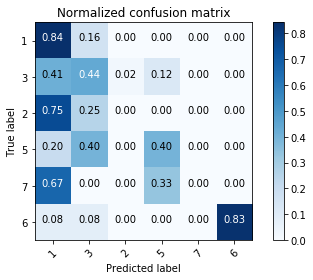

             precision    recall  f1-score   support

          1       0.69      0.72      0.71        40
          3       0.67      0.70      0.68        40
          2       0.25      0.25      0.25         4
          5       0.60      0.50      0.55         6
          7       0.00      0.00      0.00         4
          6       0.71      0.77      0.74        13

avg / total       0.64      0.66      0.65       107

accuracy:  0.6635514018691588


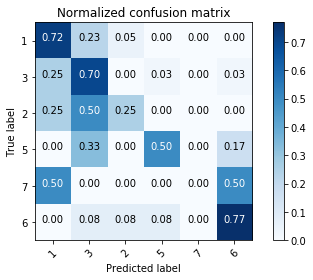

             precision    recall  f1-score   support

          1       0.48      0.90      0.63        30
          3       0.66      0.64      0.65        36
          2       0.00      0.00      0.00        13
          5       1.00      0.29      0.44         7
          7       0.00      0.00      0.00         5
          6       0.86      0.75      0.80        16

avg / total       0.55      0.60      0.54       107

accuracy:  0.5981308411214953


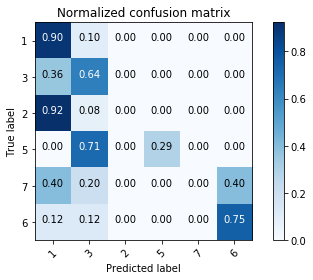

             precision    recall  f1-score   support

          1       0.62      0.83      0.71        36
          3       0.50      0.64      0.56        33
          2       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         9
          7       0.00      0.00      0.00         4
          6       0.76      0.76      0.76        17

avg / total       0.49      0.60      0.53       107

accuracy:  0.5981308411214953


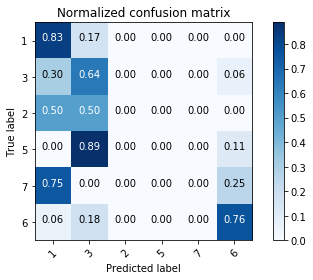

             precision    recall  f1-score   support

          1       0.51      0.82      0.63        34
          3       0.75      0.63      0.68        43
          2       0.00      0.00      0.00         9
          5       1.00      0.25      0.40         4
          7       0.00      0.00      0.00         5
          6       0.64      0.75      0.69        12

avg / total       0.57      0.61      0.57       107

accuracy:  0.6074766355140186


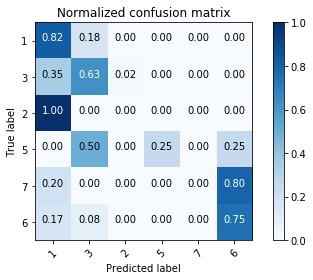

In [16]:
acc.append("Minkowski 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.52      0.79      0.63        34
          3       0.65      0.65      0.65        37
          2       0.00      0.00      0.00         8
          5       1.00      0.25      0.40         4
          7       0.00      0.00      0.00         6
          6       0.76      0.72      0.74        18

avg / total       0.56      0.61      0.56       107

accuracy:  0.6074766355140186


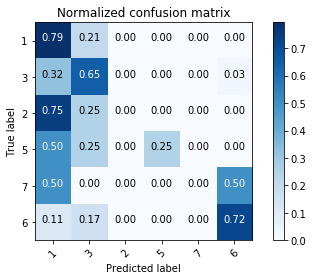

             precision    recall  f1-score   support

          1       0.60      0.89      0.72        36
          3       0.62      0.59      0.61        39
          2       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         9
          7       0.00      0.00      0.00         3
          6       0.75      0.82      0.78        11

avg / total       0.51      0.60      0.54       107

accuracy:  0.5981308411214953


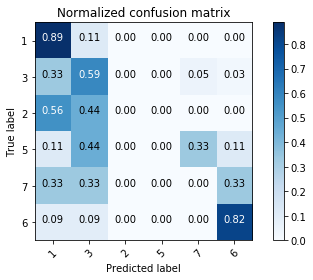

             precision    recall  f1-score   support

          1       0.50      0.84      0.63        31
          3       0.65      0.63      0.64        38
          2       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         9
          7       0.00      0.00      0.00         6
          6       0.72      0.81      0.76        16

avg / total       0.48      0.59      0.52       107

accuracy:  0.5887850467289719


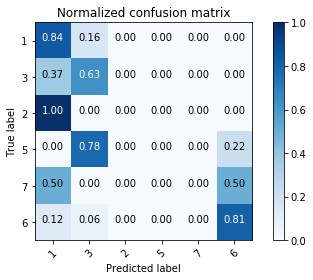

             precision    recall  f1-score   support

          1       0.62      0.79      0.70        39
          3       0.59      0.61      0.60        38
          2       0.00      0.00      0.00        10
          5       0.50      0.50      0.50         4
          7       0.00      0.00      0.00         3
          6       0.86      0.92      0.89        13

avg / total       0.56      0.64      0.59       107

accuracy:  0.6355140186915887


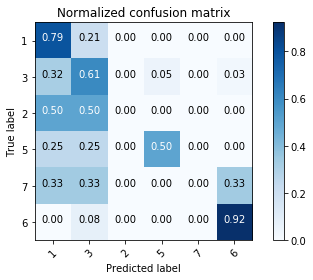

             precision    recall  f1-score   support

          1       0.57      0.74      0.64        39
          3       0.54      0.62      0.58        34
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         3
          6       0.65      0.85      0.73        13

avg / total       0.46      0.57      0.51       107

accuracy:  0.5700934579439252


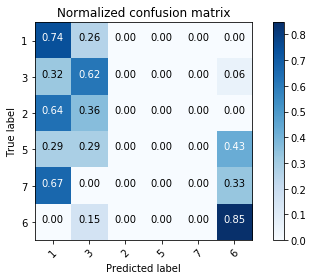

             precision    recall  f1-score   support

          1       0.51      0.77      0.62        31
          3       0.68      0.64      0.66        42
          2       0.00      0.00      0.00         6
          5       0.75      0.50      0.60         6
          7       0.00      0.00      0.00         6
          6       0.81      0.81      0.81        16

avg / total       0.58      0.63      0.59       107

accuracy:  0.6261682242990654


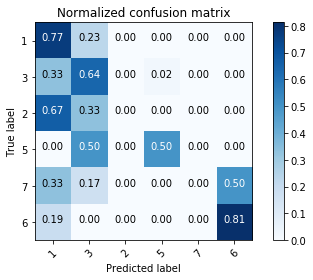

             precision    recall  f1-score   support

          1       0.48      0.82      0.61        33
          3       0.53      0.49      0.51        39
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         3
          6       0.73      0.73      0.73        15

avg / total       0.44      0.53      0.47       107

accuracy:  0.5327102803738317


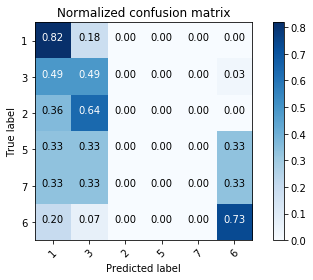

             precision    recall  f1-score   support

          1       0.62      0.86      0.72        37
          3       0.62      0.62      0.62        37
          2       0.50      0.17      0.25         6
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         6
          6       0.75      0.86      0.80        14

avg / total       0.55      0.64      0.58       107

accuracy:  0.6355140186915887


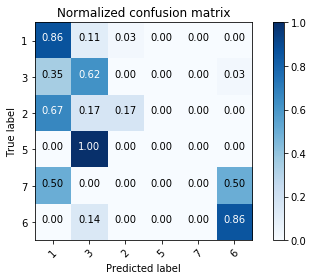

             precision    recall  f1-score   support

          1       0.53      0.82      0.64        33
          3       0.59      0.65      0.62        37
          2       0.00      0.00      0.00        10
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         6
          6       0.73      0.85      0.79        13

avg / total       0.45      0.58      0.51       107

accuracy:  0.5794392523364486


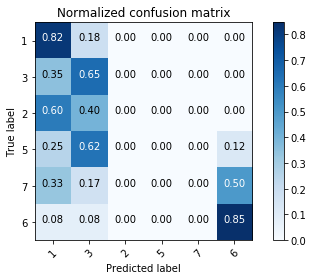

             precision    recall  f1-score   support

          1       0.60      0.86      0.71        37
          3       0.69      0.64      0.67        39
          2       0.00      0.00      0.00         7
          5       1.00      0.40      0.57         5
          7       0.00      0.00      0.00         3
          6       0.75      0.75      0.75        16

avg / total       0.62      0.66      0.63       107

accuracy:  0.6635514018691588


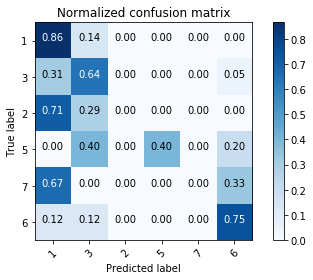

In [17]:
acc.append("Minkowski 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.47      0.72      0.57        36
          3       0.53      0.46      0.49        39
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         5
          6       0.67      0.80      0.73        15

avg / total       0.45      0.52      0.47       107

accuracy:  0.5233644859813084


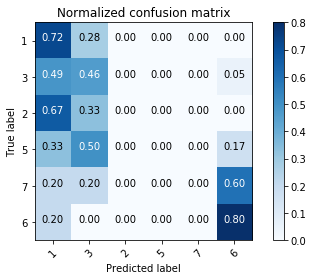

             precision    recall  f1-score   support

          1       0.54      0.85      0.66        34
          3       0.61      0.62      0.61        37
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         4
          6       0.67      0.71      0.69        14

avg / total       0.47      0.58      0.51       107

accuracy:  0.5794392523364486


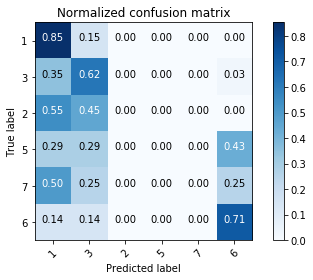

             precision    recall  f1-score   support

          1       0.65      0.26      0.37        43
          3       0.40      0.88      0.55        34
          2       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         1
          6       0.73      0.69      0.71        16

avg / total       0.50      0.49      0.43       107

accuracy:  0.48598130841121495


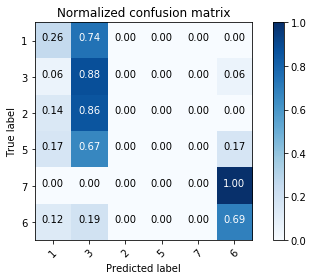

             precision    recall  f1-score   support

          1       0.37      0.85      0.51        27
          3       0.70      0.45      0.55        42
          2       0.00      0.00      0.00        10
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         8
          6       0.65      0.85      0.73        13

avg / total       0.45      0.50      0.43       107

accuracy:  0.4953271028037383


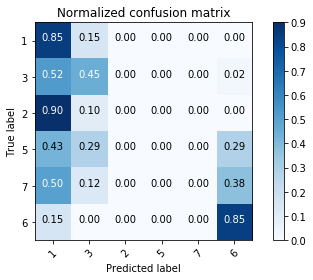

             precision    recall  f1-score   support

          1       0.48      0.78      0.60        36
          3       0.61      0.46      0.53        41
          2       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         2
          6       0.67      0.92      0.77        13

avg / total       0.48      0.55      0.50       107

accuracy:  0.5514018691588785


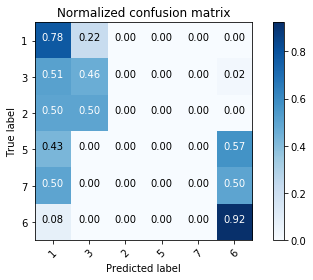

             precision    recall  f1-score   support

          1       0.56      0.82      0.67        34
          3       0.59      0.69      0.63        35
          2       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         7
          6       0.69      0.69      0.69        16

avg / total       0.47      0.59      0.52       107

accuracy:  0.5887850467289719


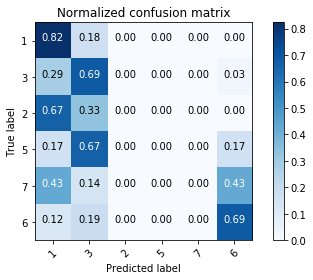

             precision    recall  f1-score   support

          1       0.43      0.83      0.57        30
          3       0.60      0.51      0.55        41
          2       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         6
          6       0.79      0.73      0.76        15

avg / total       0.46      0.53      0.48       107

accuracy:  0.5327102803738317


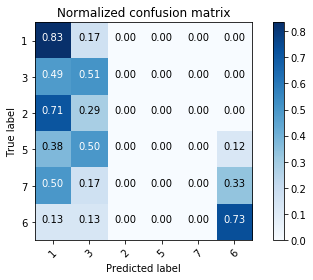

             precision    recall  f1-score   support

          1       0.61      0.68      0.64        40
          3       0.52      0.66      0.58        35
          2       0.00      0.00      0.00        10
          5       0.00      0.00      0.00         5
          7       0.00      0.00      0.00         3
          6       0.63      0.86      0.73        14

avg / total       0.48      0.58      0.53       107

accuracy:  0.5794392523364486


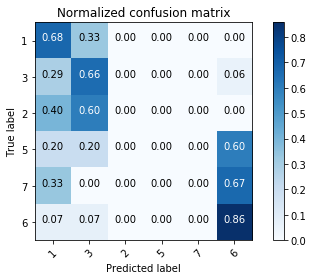

             precision    recall  f1-score   support

          1       0.53      0.91      0.67        34
          3       0.62      0.51      0.56        35
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         6
          6       0.63      0.80      0.71        15

avg / total       0.46      0.57      0.49       107

accuracy:  0.5700934579439252


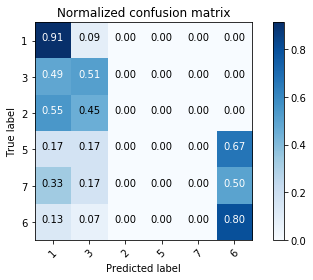

             precision    recall  f1-score   support

          1       0.48      0.89      0.63        36
          3       0.64      0.39      0.48        41
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         3
          6       0.69      0.79      0.73        14

avg / total       0.50      0.55      0.49       107

accuracy:  0.5514018691588785


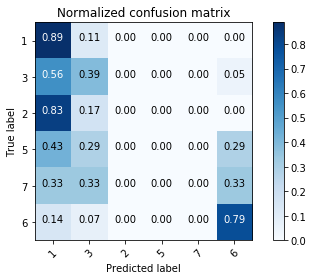

In [18]:
acc.append("Minkowski 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

             precision    recall  f1-score   support

          1       0.38      0.74      0.51        31
          3       0.49      0.55      0.52        42
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00         5
          7       0.00      0.00      0.00         7
          6       0.00      0.00      0.00        16

avg / total       0.30      0.43      0.35       107

accuracy:  0.42990654205607476


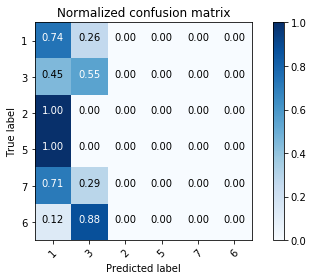

             precision    recall  f1-score   support

          1       0.53      0.44      0.48        39
          3       0.39      0.82      0.53        34
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         2
          6       0.33      0.08      0.12        13

avg / total       0.36      0.43      0.36       107

accuracy:  0.42990654205607476


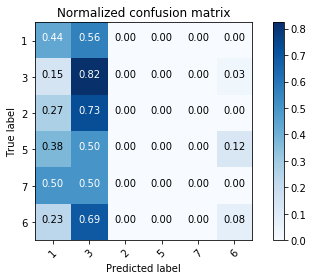

             precision    recall  f1-score   support

          1       0.29      0.50      0.37        32
          3       0.42      0.59      0.49        37
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         6
          7       0.00      0.00      0.00         5
          6       0.00      0.00      0.00        16

avg / total       0.23      0.36      0.28       107

accuracy:  0.35514018691588783


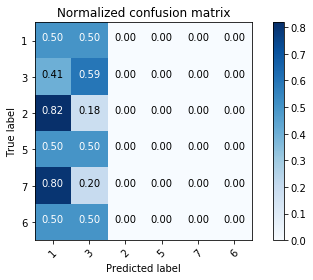

             precision    recall  f1-score   support

          1       0.39      0.42      0.41        38
          3       0.39      0.67      0.50        39
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00         7
          7       0.00      0.00      0.00         4
          6       0.00      0.00      0.00        13

avg / total       0.28      0.39      0.32       107

accuracy:  0.3925233644859813


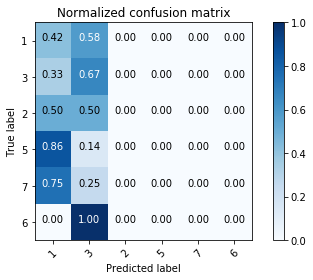

             precision    recall  f1-score   support

          1       0.21      0.20      0.21        35
          3       0.31      0.70      0.43        33
          2       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         4
          6       0.00      0.00      0.00        18

avg / total       0.17      0.28      0.20       107

accuracy:  0.2803738317757009


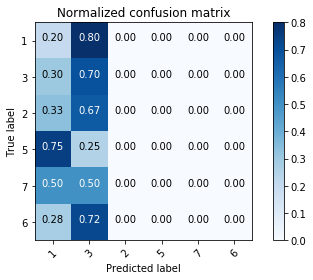

             precision    recall  f1-score   support

          1       0.39      1.00      0.56        35
          3       0.00      0.00      0.00        43
          2       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         5
          7       0.00      0.00      0.00         5
          6       0.46      0.55      0.50        11

avg / total       0.17      0.38      0.23       107

accuracy:  0.38317757009345793


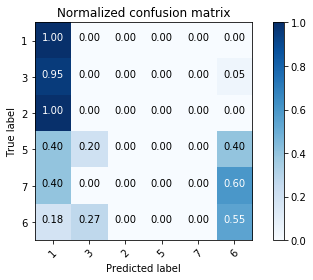

             precision    recall  f1-score   support

          1       0.39      0.97      0.55        32
          3       0.22      0.16      0.19        37
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00         9
          7       0.00      0.00      0.00         7
          6       0.00      0.00      0.00        16

avg / total       0.19      0.35      0.23       107

accuracy:  0.34579439252336447


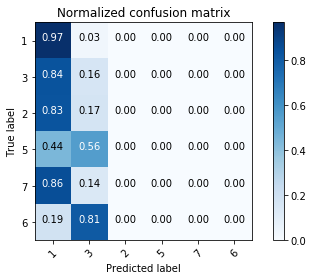

             precision    recall  f1-score   support

          1       0.35      0.34      0.35        38
          3       0.44      0.72      0.55        39
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         4
          7       0.00      0.00      0.00         2
          6       1.00      0.54      0.70        13

avg / total       0.41      0.45      0.41       107

accuracy:  0.4485981308411215


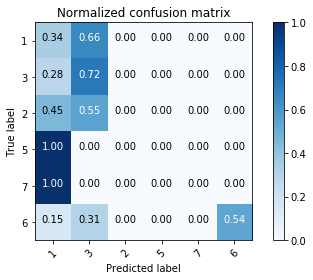

             precision    recall  f1-score   support

          1       0.32      0.94      0.48        31
          3       0.82      0.33      0.47        43
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00         4
          7       0.00      0.00      0.00         7
          6       0.00      0.00      0.00        16

avg / total       0.42      0.40      0.33       107

accuracy:  0.40186915887850466


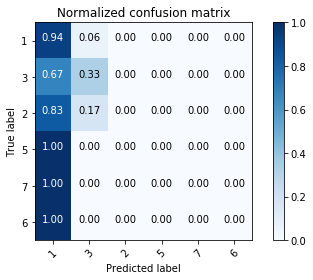

             precision    recall  f1-score   support

          1       0.54      0.33      0.41        39
          3       0.36      0.88      0.51        33
          2       0.00      0.00      0.00        11
          5       0.00      0.00      0.00         9
          7       0.00      0.00      0.00         2
          6       0.67      0.15      0.25        13

avg / total       0.39      0.41      0.34       107

accuracy:  0.411214953271028


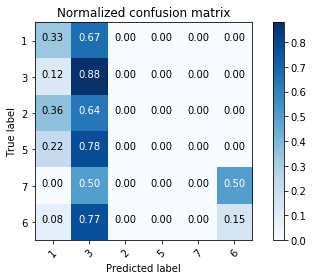

In [19]:
acc.append("Minkowski 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [20]:
print acc


with open("accGlassWithoutNoise.csv", 'wb') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)
    #writer.writerow(list_of_emails)
    

['Euclidean 1', 0.7663551401869159, 0.6728971962616822, 0.6542056074766355, 0.6822429906542056, 0.719626168224299, 0.616822429906542, 0.7009345794392523, 0.7009345794392523, 0.6822429906542056, 0.6635514018691588, 'Euclidean 5', 0.6542056074766355, 0.6261682242990654, 0.6635514018691588, 0.6635514018691588, 0.6915887850467289, 0.616822429906542, 0.6915887850467289, 0.5700934579439252, 0.6728971962616822, 0.616822429906542, 'Euclidean 10', 0.616822429906542, 0.6074766355140186, 0.5607476635514018, 0.6355140186915887, 0.6074766355140186, 0.6635514018691588, 0.5700934579439252, 0.7102803738317757, 0.6261682242990654, 0.6448598130841121, 'Euclidean 15', 0.6074766355140186, 0.616822429906542, 0.616822429906542, 0.616822429906542, 0.6355140186915887, 0.5327102803738317, 0.6448598130841121, 0.5887850467289719, 0.5887850467289719, 0.5794392523364486, 'Euclidean 20', 0.5981308411214953, 0.5794392523364486, 0.5420560747663551, 0.6261682242990654, 0.6261682242990654, 0.5607476635514018, 0.5981308